In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [237]:
from pandas_datareader.data import DataReader
import yfinance as yf
from  pandas_datareader import data as pdr
from datetime import datetime

In [238]:
import os
directory = '/content/drive/MyDrive/stock_forecasting/dataset'

In [239]:
df = pd.DataFrame()
for fname in os.listdir(directory):
    if fname.endswith('.csv'):
        df1 = pd.read_csv(os.path.join(directory, fname))
        df = pd.concat([df, df1], ignore_index=True)

In [240]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...,...
459330,VIC,12/22/2020 14:22,105.80,105.80,105.70,105.70,1870,0
459331,VIC,12/22/2020 14:23,105.70,105.70,105.70,105.70,2510,0
459332,VIC,12/22/2020 14:24,105.70,105.70,105.70,105.70,3620,0
459333,VIC,12/22/2020 14:25,105.70,105.70,105.70,105.70,100,0


In [241]:
import datetime

def str_to_datetime(s):
  split = s.split()[0].split('/')
  year, month, day = int(split[2]), int(split[0]), int(split[1])
  return datetime.datetime(year=year, month=month, day=day)

In [242]:
df_copy = df
df_copy.rename(columns={'Date/Time': 'Date'}, inplace=True)
df_copy['Date'] = df_copy['Date'].apply(str_to_datetime)
df_copy.head()

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-02-28,78.94,78.94,78.94,78.94,10,0
2,PNJ,2018-02-28,78.14,78.14,78.14,78.14,283,0
3,PNJ,2018-02-28,78.14,78.14,78.14,78.14,480,0
4,PNJ,2018-02-28,78.14,78.14,78.14,78.14,146,0


In [243]:
df_copy = df_copy.groupby(['Ticker', 'Date']).agg({'Volume': 'sum', 'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Open Interest': 'mean'}).reset_index()
df_copy

,Ticker,Date,Volume,Open,High,Low,Close,Open Interest
0,FPT,2018-12-25,84960,30.760000,30.781429,30.744286,30.760000,0.0
1,FPT,2018-12-26,333590,31.048016,31.054683,31.042857,31.050159,0.0
2,FPT,2018-12-27,454860,31.332537,31.335821,31.327313,31.331567,0.0
3,FPT,2018-12-28,387170,31.322213,31.326803,31.318525,31.321557,0.0
4,FPT,2019-01-02,459120,31.231709,31.238376,31.224188,31.232393,0.0
...,...,...,...,...,...,...,...,...
2499,VIC,2020-12-16,756200,106.501961,106.519608,106.474510,106.493627,0.0
2500,VIC,2020-12-17,1352580,105.208290,105.234197,105.176684,105.200518,0.0
2501,VIC,2020-12-18,1350780,105.334404,105.368349,105.301376,105.328899,0.0
2502,VIC,2020-12-21,587100,105.670950,105.697765,105.628492,105.663128,0.0


In [244]:
df_copy.index = df_copy.pop('Date')
df_copy

,Ticker,Volume,Open,High,Low,Close,Open Interest
Date,,,,,,,
2018-12-25,FPT,84960,30.760000,30.781429,30.744286,30.760000,0.0
2018-12-26,FPT,333590,31.048016,31.054683,31.042857,31.050159,0.0
2018-12-27,FPT,454860,31.332537,31.335821,31.327313,31.331567,0.0
2018-12-28,FPT,387170,31.322213,31.326803,31.318525,31.321557,0.0
2019-01-02,FPT,459120,31.231709,31.238376,31.224188,31.232393,0.0
...,...,...,...,...,...,...,...
2020-12-16,VIC,756200,106.501961,106.519608,106.474510,106.493627,0.0
2020-12-17,VIC,1352580,105.208290,105.234197,105.176684,105.200518,0.0
2020-12-18,VIC,1350780,105.334404,105.368349,105.301376,105.328899,0.0


In [245]:
FPT = df_copy.loc[df_copy['Ticker']=='FPT']
MSN = df_copy.loc[df_copy['Ticker']=='MSN']
PNJ = df_copy.loc[df_copy['Ticker']=='PNJ']
VIC = df_copy.loc[df_copy['Ticker']=='VIC']

In [246]:
company_list = [FPT, MSN, PNJ, VIC]
company_name = ["FPT", "MSN", "PNJ", "VIC"]

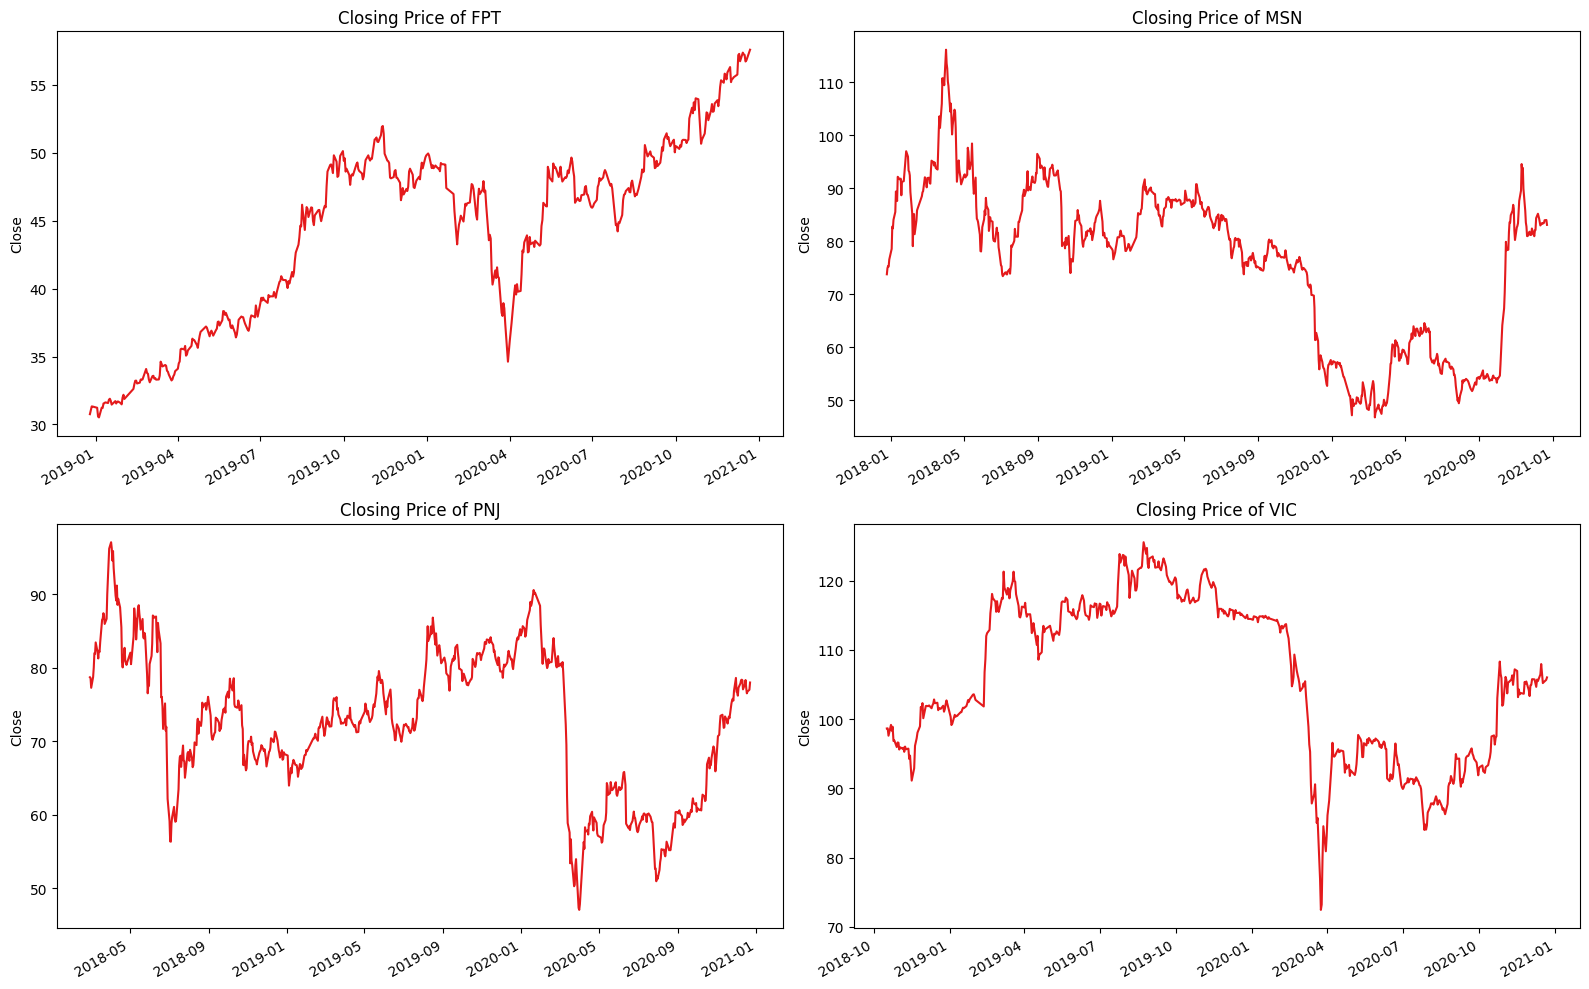

In [247]:
plt.figure(figsize=(16,10))
plt.subplots_adjust(top=1.50,bottom=1.4)
for i, company in enumerate (company_list,1):
    plt.subplot(2,2,i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
plt.tight_layout()
plt.savefig('Trends.png')

<ipython-input-248-6e335cf1e843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['Close'].rolling(ma).mean()
<ipython-input-248-6e335cf1e843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['Close'].rolling(ma).mean()
<ipython-input-248-6e335cf1e843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

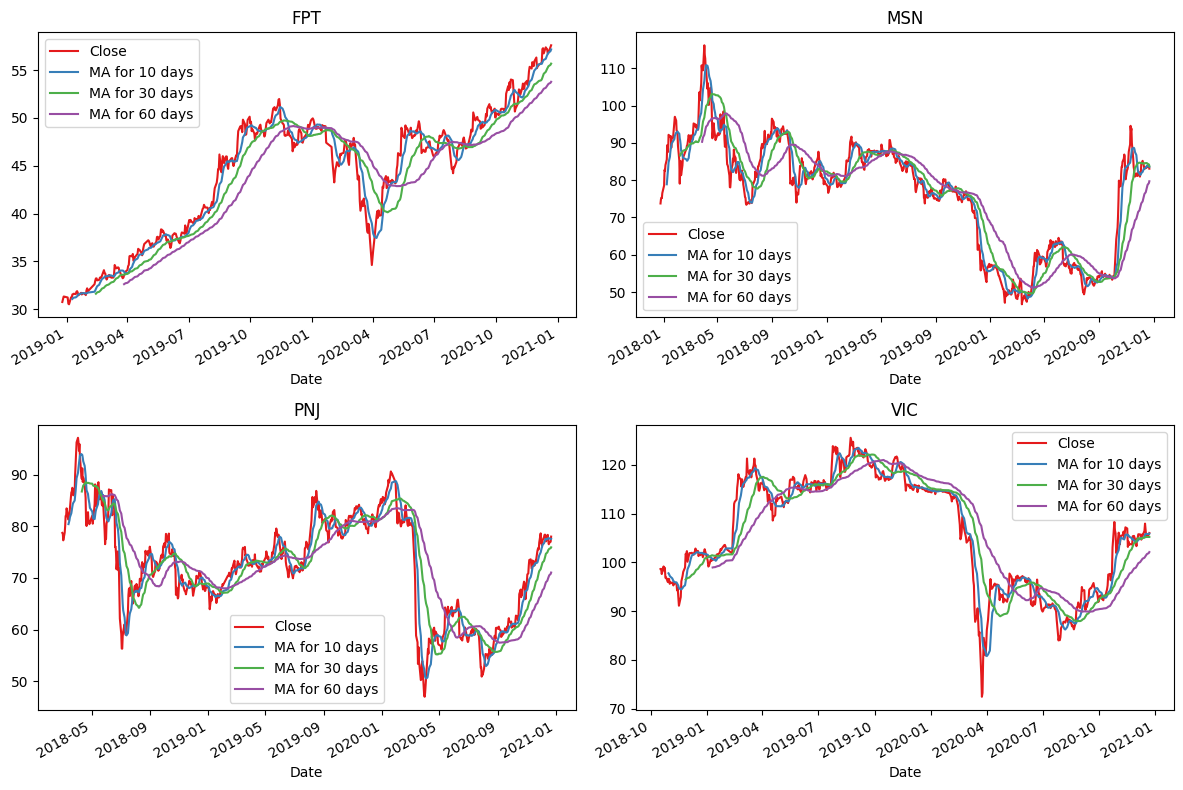

In [248]:
def plot_stock_with_moving_averages(df, ma_days, title, ax):
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Close'].rolling(ma).mean()

    cols_to_plot = ['Close'] + [f'MA for {ma} days' for ma in ma_days]
    df[cols_to_plot].plot(ax=ax)
    ax.set_title(title)

ma_day = [10, 30, 60]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    if i < len(company_list):
        plot_stock_with_moving_averages(company_list[i], ma_day, company_name[i], ax)

fig.tight_layout()


plt.savefig('stock_plots.png')

# Show the plot
plt.show()

<ipython-input-249-7501f165fd9a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Close'].pct_change()
<ipython-input-249-7501f165fd9a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Close'].pct_change()
<ipython-input-249-7501f165fd9a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

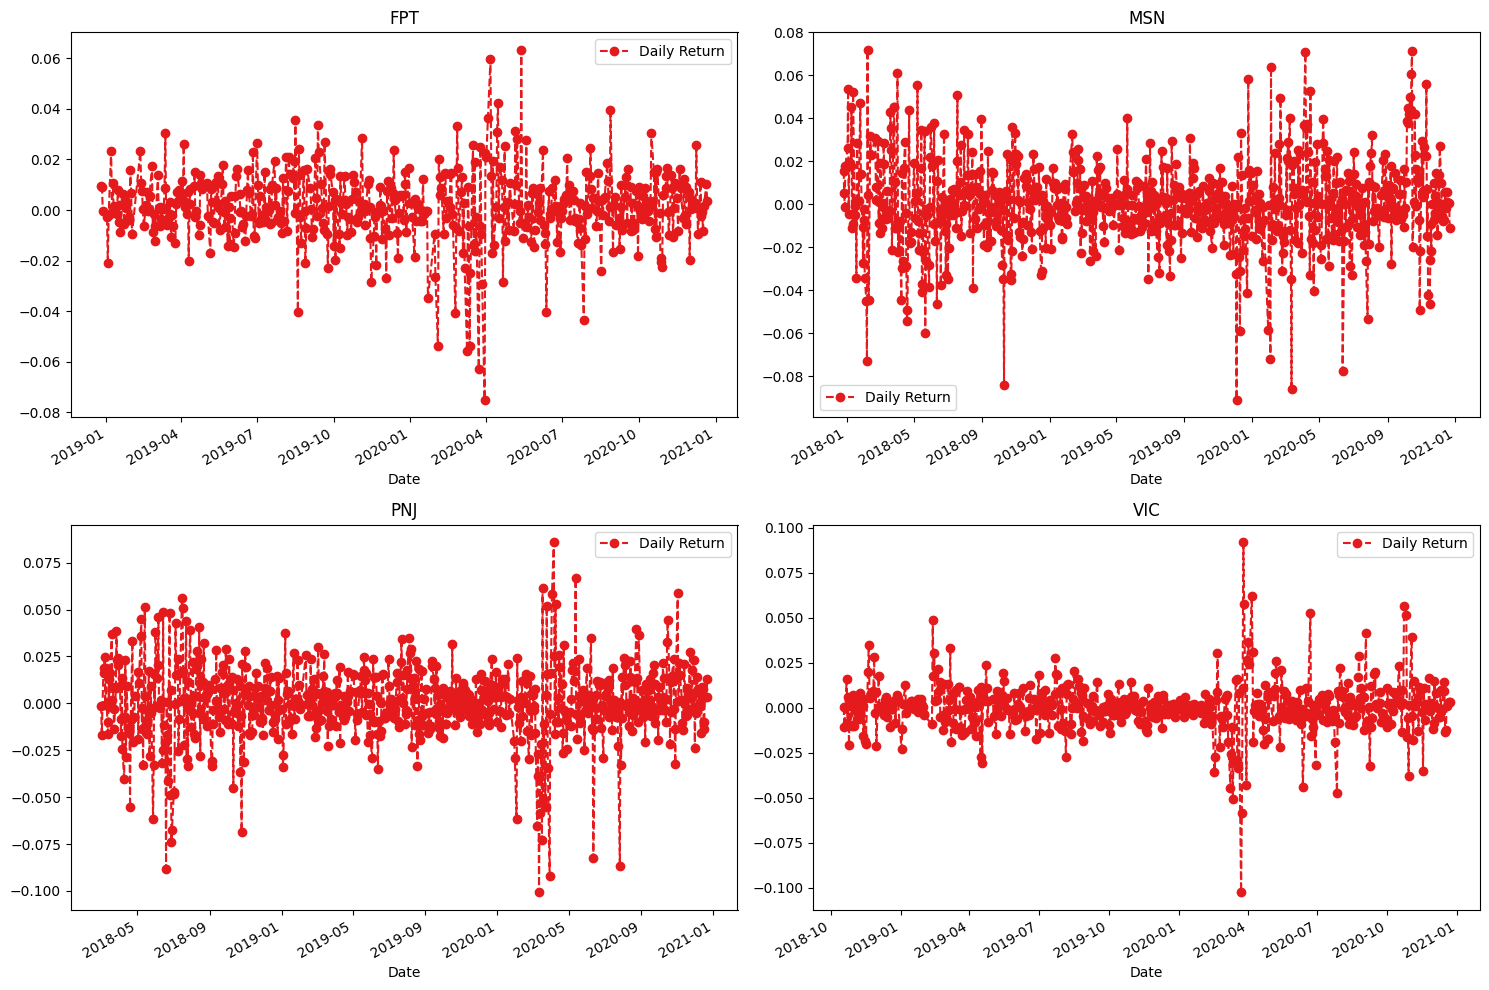

In [249]:
company_data = [(FPT, 'FPT'), (MSN, 'MSN'), (PNJ, 'PNJ'), (VIC, 'VIC')]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (company, name) in enumerate(company_data):

    company['Daily Return'] = company['Close'].pct_change()


    ax = axes[i // 2, i % 2]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(name)


fig.tight_layout()


plt.show()

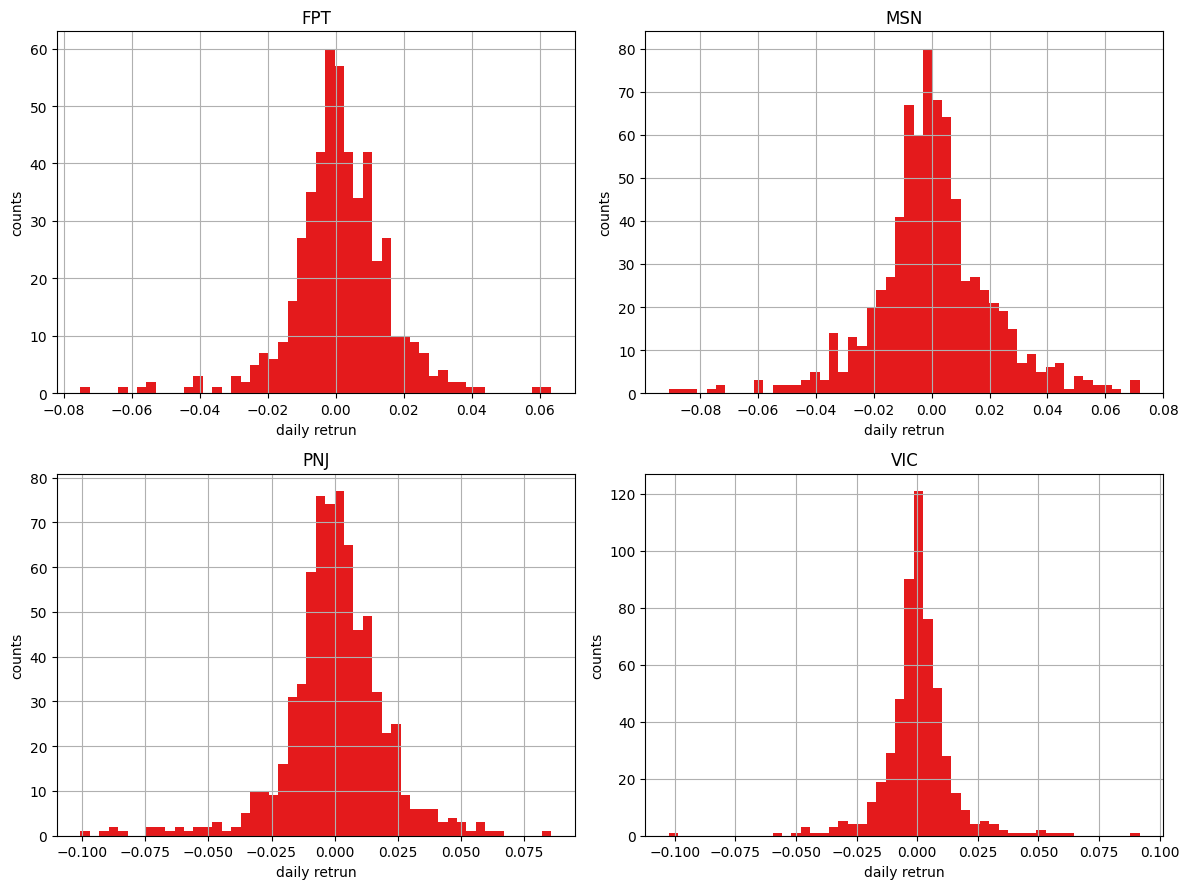

In [250]:
plt.figure(figsize=(12,9))

for i,company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('daily retrun')
    plt.ylabel('counts')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()
plt.savefig('average daily price.png')

In [251]:
df

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-02-28,78.94,78.94,78.94,78.94,10,0
2,PNJ,2018-02-28,78.14,78.14,78.14,78.14,283,0
3,PNJ,2018-02-28,78.14,78.14,78.14,78.14,480,0
4,PNJ,2018-02-28,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...,...
459330,VIC,2020-12-22,105.80,105.80,105.70,105.70,1870,0
459331,VIC,2020-12-22,105.70,105.70,105.70,105.70,2510,0
459332,VIC,2020-12-22,105.70,105.70,105.70,105.70,3620,0
459333,VIC,2020-12-22,105.70,105.70,105.70,105.70,100,0


In [274]:
closing_df = df
closing_df.rename(columns={'Date/Time': 'Date'}, inplace=True)
#df1['Date'] = df1['Date'].apply(str_to_datetime)
closing_df = closing_df.groupby(['Ticker', 'Date']).agg({'Volume': 'sum', 'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Open Interest': 'mean'}).reset_index()

closing_df = closing_df.set_index(['Date', 'Ticker'], inplace = False)['Close']
closing_df = closing_df.unstack()

tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,FPT,MSN,PNJ,VIC
Date,,,,
2017-12-25,NaN,NaN,NaN,NaN
2017-12-26,NaN,0.015497,NaN,NaN
2017-12-27,NaN,0.005265,NaN,NaN
2017-12-28,NaN,-0.001134,NaN,NaN
2017-12-29,NaN,0.017741,NaN,NaN


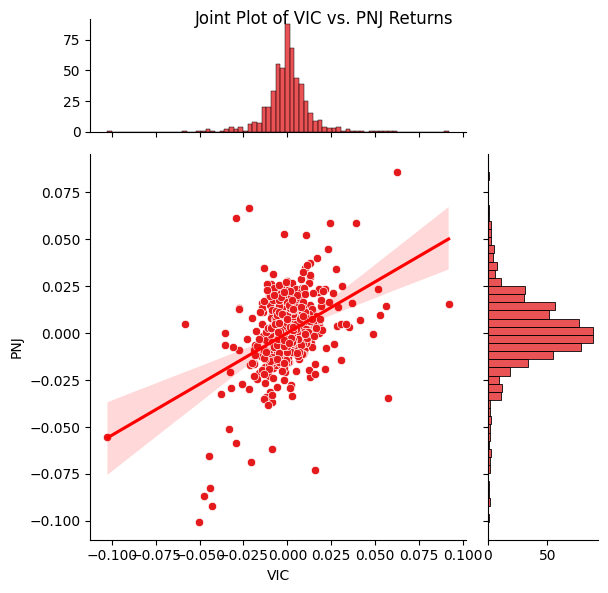

In [275]:
sns.set_palette("Set1")

jointplot = sns.jointplot(x='VIC', y='PNJ', data=tech_rets, kind='scatter', height=6, ratio=3, marginal_ticks=True)

plt.suptitle("Joint Plot of VIC vs. PNJ Returns", fontsize=12)

# Add regression lines
sns.regplot(x='VIC', y='PNJ', data=tech_rets, scatter=False, ax=jointplot.ax_joint, color='r')
# plt.savefig('Goog vs MSFT.png')


plt.show()

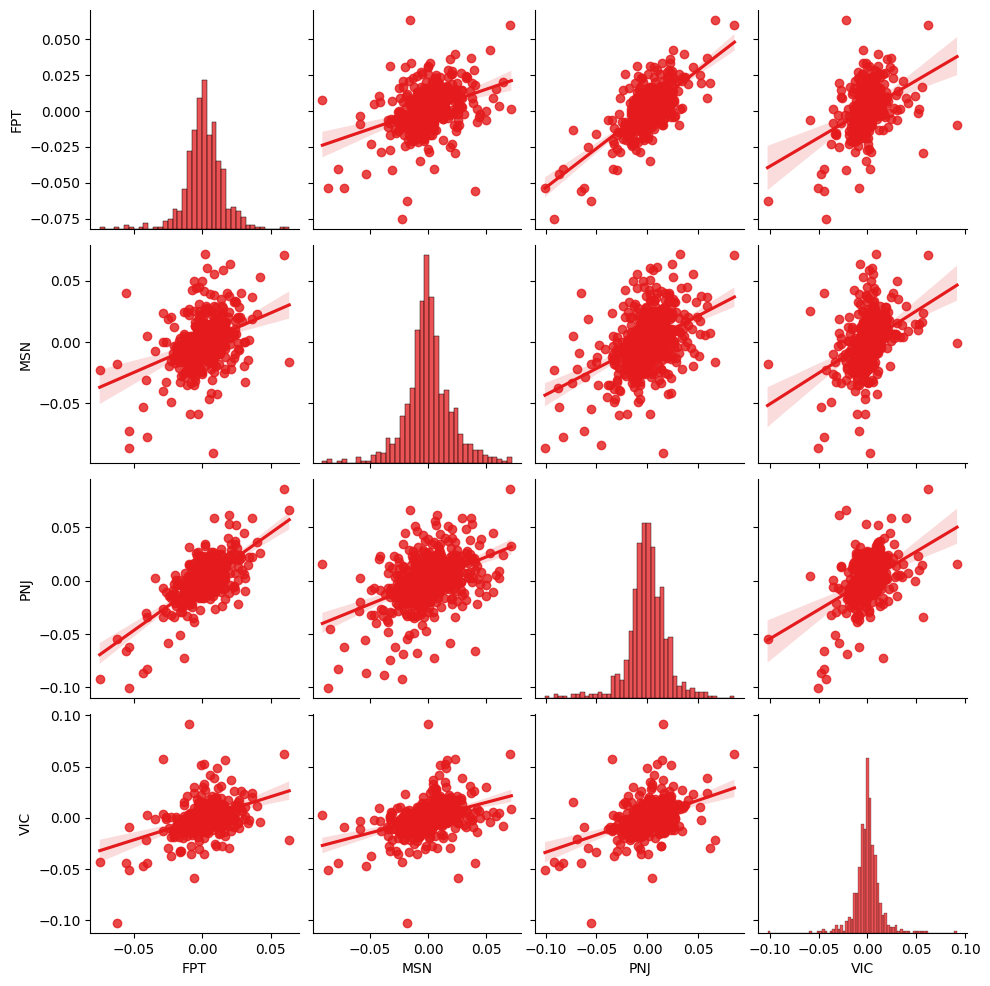

In [276]:
sns.pairplot(tech_rets, kind = 'reg')
plt.savefig('pairplot.png')
plt.savefig('Pairplot.png')

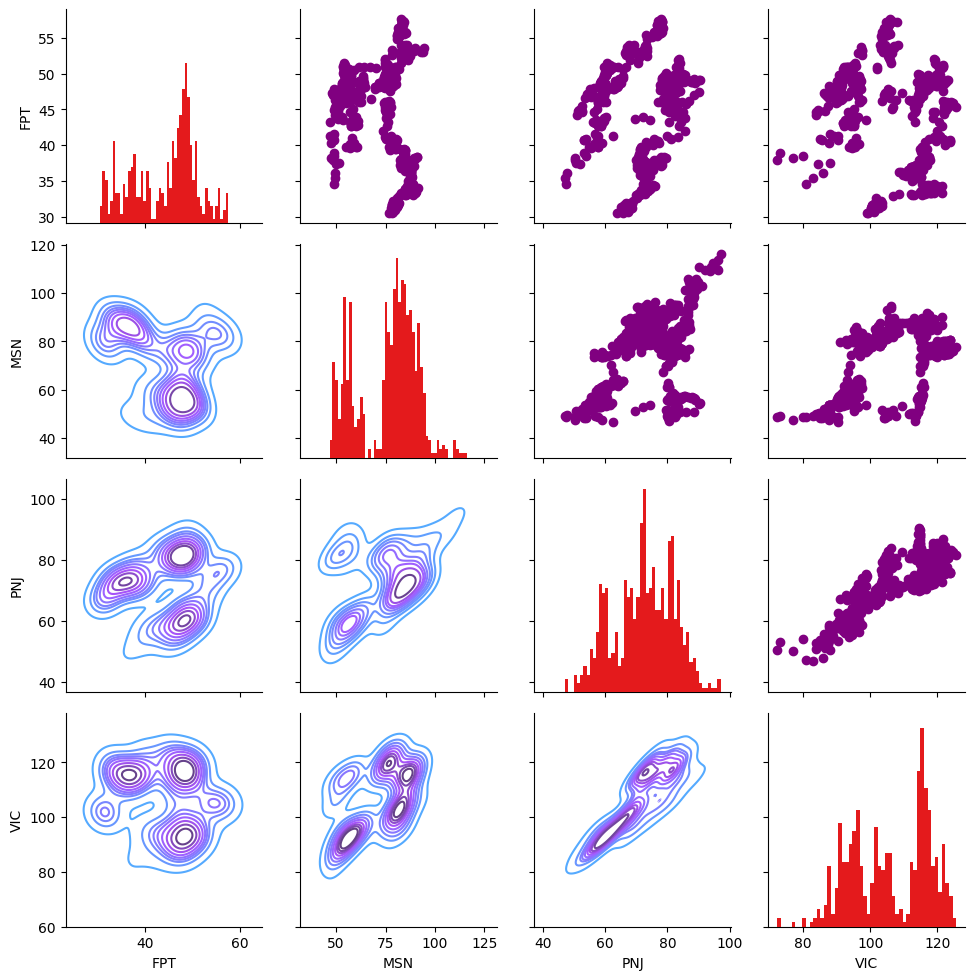

In [279]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=50)
plt.savefig('pairgrid.png')

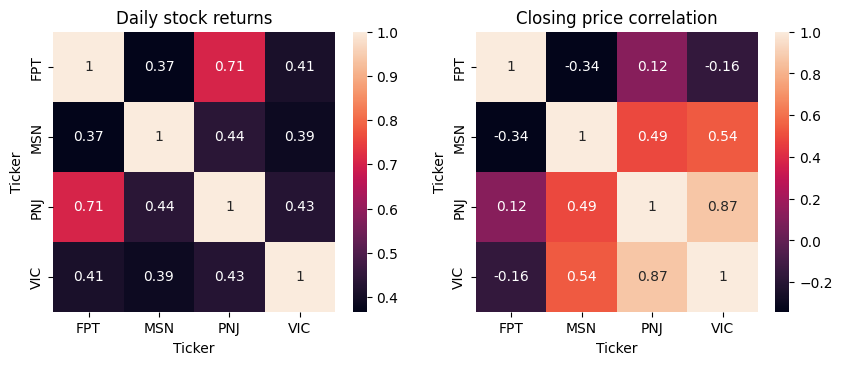

In [280]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Daily stock returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Closing price correlation')
plt.savefig('Correlation matrix.png')

In [281]:
rets = tech_rets.dropna()
std = rets.std()

In [282]:
VaR = (std * 1.96)
print('VaR at 95% Confidence level in %:', VaR)

VaR at 95% Confidence level in %: Ticker
FPT    0.027991
MSN    0.037065
PNJ    0.036242
VIC    0.028836
dtype: float64


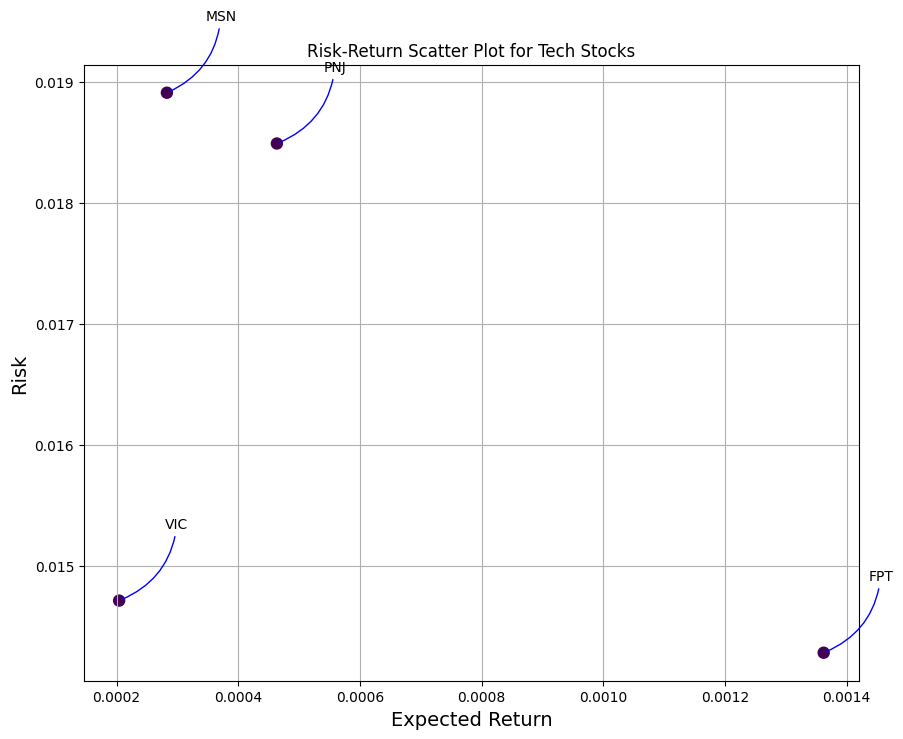

In [284]:
import matplotlib.cm as cm

area = np.pi * 20
cmap = cm.viridis

plt.figure(figsize=(10, 8), facecolor='white')
plt.scatter(rets.mean(), rets.std(), s=area, c=cmap(rets.mean()), marker='o')
plt.grid(True)
plt.xlabel('Expected Return', fontsize=14)
plt.ylabel('Risk', fontsize=14)
plt.title('Risk-Return Scatter Plot for Tech Stocks')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.savefig('risk.png')
plt.show()

In [290]:
dataset = PNJ.iloc[:, 1:6]
dataset

,Volume,Open,High,Low,Close
Date,,,,,
2018-02-28,8158,78.720430,78.799355,78.651183,78.716989
2018-03-01,20511,78.605526,78.636513,78.569934,78.606184
2018-03-02,37274,77.274695,77.295488,77.257866,77.280610
2018-03-05,27737,78.757226,78.823806,78.702129,78.755935
2018-03-06,41077,80.035815,80.169565,79.956685,80.036957
...,...,...,...,...,...
2020-12-16,636190,77.280526,77.294211,77.269474,77.283158
2020-12-17,1289500,76.527011,76.554598,76.499425,76.524138
2020-12-18,582740,76.759341,76.783516,76.735165,76.768681


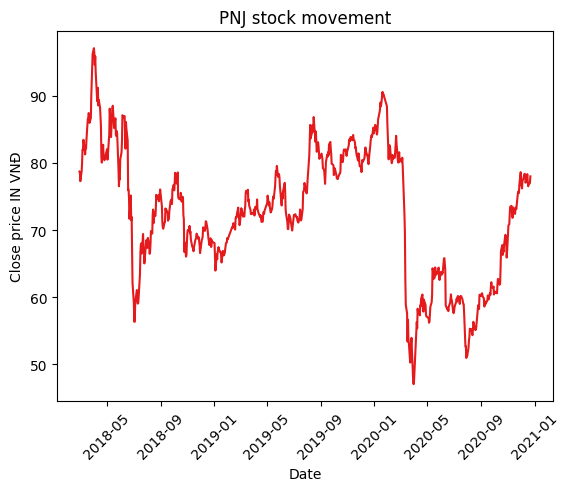

In [300]:
plt.Figure(figsize=(13, 6))
plt.plot(dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Close price IN VNĐ')
plt.xticks(rotation=45, fontsize=10)
plt.title('PNJ stock movement')
plt.show()

In [324]:
data = dataset.filter(['Close'])

dts = data.values

training_data_len = int(np.ceil(len(dts)*.95))
training_data_len

674

In [325]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dts)

In [329]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(15, len(train_data)):
    x_train.append(train_data[i-15:i, 0])
    y_train.append(train_data[i, 0])

    if i<=15:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.63274201, 0.63052979, 0.60406477, 0.63351957, 0.65909508,
       0.69828951, 0.69676607, 0.72744498, 0.70054074, 0.68391523,
       0.70490836, 0.70140798, 0.72775127, 0.78926893, 0.7922644 ])]
[0.8069630085304874]



In [330]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [331]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.1))

model.add(Dense(1))

In [332]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
659/659 [==============================] - 14s 14ms/step - loss: 0.0097
Epoch 2/10
659/659 [==============================] - 11s 17ms/step - loss: 0.0050
Epoch 3/10
659/659 [==============================] - 11s 17ms/step - loss: 0.0036
Epoch 4/10
659/659 [==============================] - 12s 18ms/step - loss: 0.0031
Epoch 5/10
659/659 [==============================] - 9s 14ms/step - loss: 0.0026
Epoch 6/10
659/659 [==============================] - 11s 17ms/step - loss: 0.0025
Epoch 7/10
659/659 [==============================] - 11s 17ms/step - loss: 0.0020
Epoch 8/10
659/659 [==============================] - 10s 15ms/step - loss: 0.0018
Epoch 9/10
659/659 [==============================] - 11s 16ms/step - loss: 0.0019
Epoch 10/10
659/659 [==============================] - 11s 17ms/step - loss: 0.0016


In [333]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 15:, :]

# Initialize lists for x_test and y_test
x_test = []
y_test = dts[training_data_len:, :]

# Create input sequences for testing
for i in range(15, len(test_data)):
    x_test.append(test_data[i-15:i, 0])

# Convert x_test to a numpy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Get model predictions and inverse transform them
predictions = scaler.inverse_transform(model.predict(x_test))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

2/2 [==============================] - 1s 10ms/step


0.8812730683267519

<ipython-input-334-9271de201c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


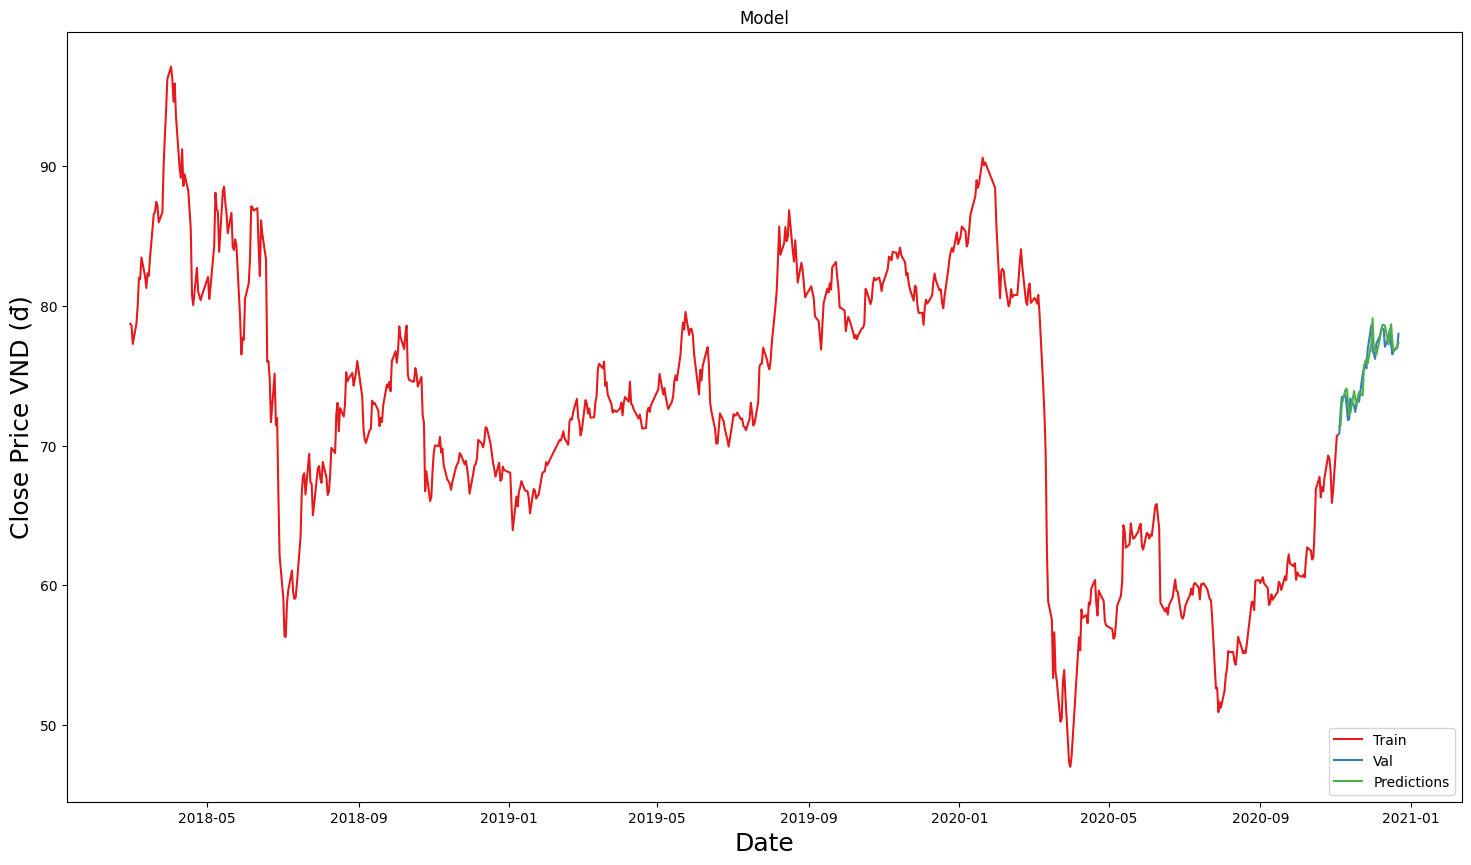

In [334]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND (đ)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('predicted.png')
plt.show()

In [335]:
valid

,Close,Predictions
Date,,
2020-11-04,70.872095,71.368118
2020-11-05,72.389541,71.400955
2020-11-06,73.466861,72.941162
2020-11-09,73.605459,74.006744
2020-11-10,72.845070,74.071960
2020-11-11,71.827045,73.248428
2020-11-12,71.888564,72.223518
2020-11-13,73.376082,72.335602
2020-11-16,72.863636,73.906067
